# Ejercicio de Paridad
El problema de XOR es equivalente al problema de paridad para dos variables, es decir, el resultado es 1 solo cuando la cantidad de unos en la entrada es
impar. Implementar un perceptrón multicapa que pueda aprender el problema
de paridad para distintas cantidades de variables de entrada.
Entrenarlo para 2, 3, 4, 5 y 6 variables de entrada probando las siguientes
estrategias.

1. Con unidades binarias y bipolares.
2. Variando la cantidad de capas ocultas y la cantidad de unidades por capa.
3. Con distintos valores para el coeficiente de aprendizaje.

In [23]:
import numpy as np
from testing_utils import posibilidadesFuncionActivacion, TipoDatoBipolar, FuncionSigmoidea, FuncionEscalon
from matplotlib import pyplot as mpl
from perceptron_multicapa import PerceptronMulticapa
import itertools


In [24]:
M = 1
func_sigmoidea = FuncionSigmoidea()
func_escalon = FuncionEscalon()
lin = lambda x: x
const = lambda x: 1
tipoDato = TipoDatoBipolar()
sig = func_sigmoidea.getG(tipoDato=tipoDato.getTipoDato())
sig_der = func_sigmoidea.getdGdx(tipoDato=tipoDato.getTipoDato())
esc = func_escalon.getG(tipoDato=tipoDato.getTipoDato())
esc_der = func_escalon.getdGdx(tipoDato=tipoDato.getTipoDato())

Tipo de Dato Bipolar
La cantidad de bits de entrada es 6
El último error es de 0.0


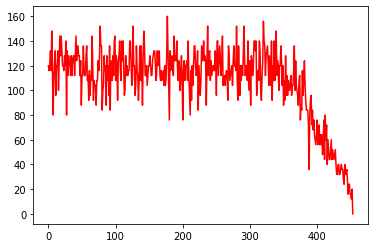

0.2
[0. 0. 0. 0. 1.]


In [26]:

N = 6
x = np.array([list(tup) for tup in itertools.product([0, 1], repeat=N)])
z = np.sum(x, axis=1) % 2

indexes = np.random.permutation(x.shape[0])

tst = indexes[-5:]
trn = indexes[:-5]


pmc = PerceptronMulticapa([N, 8, 4, 1], [sig, sig, esc], [
                          sig_der, sig_der, esc_der])
E = pmc.fit(tipoDato.getX(x[trn]), tipoDato.getZ(z[trn]))
print(
    f'{tipoDato.getName()}\nLa cantidad de bits de entrada es {N}\nEl último error es de {E[-1]}')
mpl.plot(E, 'r')
mpl.show()

YPred = pmc.activacion(tipoDato.getX(x[tst]))[-1][:, 0]
YBinario = (YPred + 1)/2
e = np.mean(np.square(z[tst] - YBinario))
print(e)
print(z[tst] - YBinario)
